In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_datareader as pdr
import pandas_datareader.data as web
import yfinance as yf


In [2]:
df = pd.read_csv(r"../data/AAPL.csv")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
10779,2023-09-15 00:00:00-04:00,176.479996,176.500000,173.820007,175.009995,109205100,0.0,0.0
10780,2023-09-18 00:00:00-04:00,176.479996,179.380005,176.169998,177.970001,67257600,0.0,0.0
10781,2023-09-19 00:00:00-04:00,177.520004,179.630005,177.130005,179.070007,51826900,0.0,0.0
10782,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58333200,0.0,0.0


In [3]:
def plot_closing_graph(df, log_y=True):
    fig = px.line(df, 'Date', 'Close', title="Closing stock prices", log_y=log_y)
    return fig

In [4]:
def plot_sales_volume_graph(df, log_y=True):
    fig = px.line(df, 'Date', 'Volume', title="Closing stock prices", log_y=log_y)
    return fig

In [5]:
plot_closing_graph(df)
plot_sales_volume_graph(df)

In [6]:
def plot_moving_averages(df, log_y=False):
    # Calculate moving averages
    df['MA_10'] = df['Close'].rolling(window=10*5).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()

    # Plot using Plotly Express
    fig = px.line(df, x='Date', y=['Close', 'MA_10', 'MA_20', 'MA_50'],
                  title='Moving Averages',
                  labels={'Date': 'Date', 'value': 'Price', 'variable': 'Moving Average'},
                  log_y=log_y,
                  )
    
    fig.update_xaxes(type='category')  # Set x-axis type to category for dates
    
    return fig

In [7]:
plot_moving_averages(df)

In [8]:
def plot_average_daily_return(dataframe):
    # Calculate daily returns
    dataframe['Daily_Return'] = dataframe['Close'].pct_change()
    
    # Remove NaN values
    dataframe.dropna(inplace=True)
    
    # Calculate cumulative returns
    dataframe['Cumulative_Return'] = (1 + dataframe['Daily_Return']).cumprod()
    
    # Plot using Plotly Express
    fig = px.line(dataframe, x=dataframe.index, y='Cumulative_Return',
                  title='Cumulative Daily Return',
                  labels={'Cumulative_Return': 'Cumulative Return', 'Date': 'Date'})
    
    # Customize layout
    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Cumulative Return",
        hovermode="x unified"
    )


In [9]:
plot_average_daily_return(df)

In [10]:

def calculate_daily_average_return(dataframe):
    # Calculate daily returns
    dataframe['Daily_Return'] = dataframe['Close'].pct_change()
    
    # Drop NaN values
    dataframe.dropna(inplace=True)
    
    # Calculate average daily return
    avg_daily_return = dataframe['Daily_Return'].mean()
    
    return avg_daily_return

def plot_daily_average_return(dataframe):
    # Calculate daily returns
    dataframe['Daily_Return'] = dataframe['Close'].pct_change()
    
    # Drop NaN values
    dataframe.dropna(inplace=True)
    
    # Plot using Plotly Express
    fig = px.line(dataframe, x=dataframe.index, y='Daily_Return',
                  title='Daily Average Return',
                  labels={'Daily_Return': 'Daily Return', 'Date': 'Date'})
    
    # Customize layout
    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Daily Return",
        hovermode="x unified"
    )
    
    return fig

# Example usage
# Load your stock data into a DataFrame
# Replace this with your actual data loading code
data = {'Date': ['2024-01-01', '2024-01-02', '2024-01-03'],
        'Close': [100, 110, 105]}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate daily average return
average_return = calculate_daily_average_return(df)
print("Average Daily Return:", average_return)

# Plot daily average return
fig = plot_daily_average_return(df)
fig.show()

Average Daily Return: 0.027272727272727337


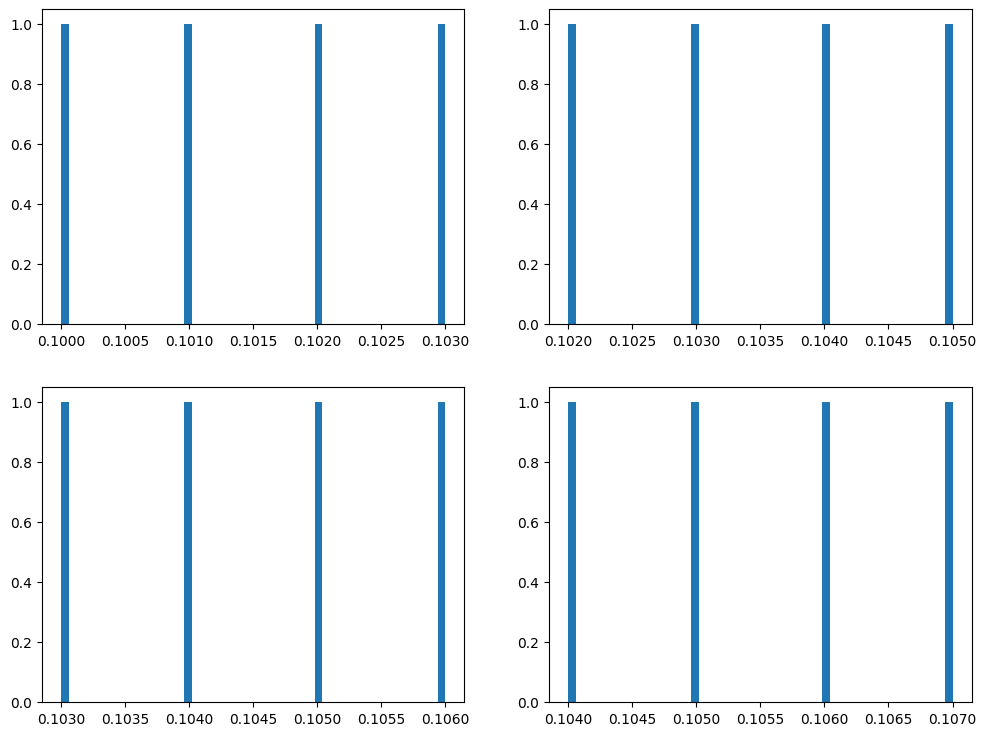

In [18]:
company_list = [
    {'Daily Return': [0.1, 0.101, 0.102, 0.103]},  # Example data for company 1
    {'Daily Return': [0.102, 0.103, 0.104, 0.105]},  # Example data for company 2
    {'Daily Return': [0.103, 0.104, 0.105, 0.106]},  # Example data for company 3
    {'Daily Return': [0.104, 0.105, 0.106, 0.107]}   # Example data for company 4
]

# Your plotting code
plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.hist(company['Daily Return'], bins=50)
plt.show()

c:\Users\ASUS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ASUS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ASUS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ASUS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ASUS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

<Figure size 800x600 with 0 Axes>

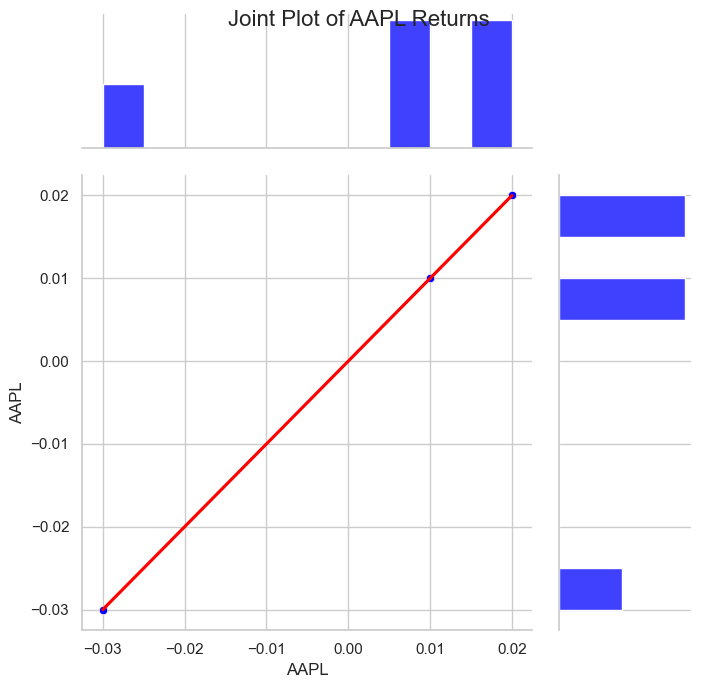

In [29]:
sns.set(style="whitegrid")  # Set style to whitegrid for better readability
plt.figure(figsize=(8, 6))  # Set larger figure size for better visualization

# Create joint plot with scatter plot and marginal histograms
joint_plot = sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='blue',
                           marginal_kws=dict(bins=10, fill=True),  # Adjust bins and fill for histograms
                           height=7, ratio=3)  # Adjust size and ratio of joint plot


joint_plot.set_axis_labels('AAPL Returns', 'AAPL Returns', fontsize=12)  
joint_plot.fig.suptitle('Joint Plot of AAPL Returns', fontsize=16) 


sns.regplot(x='AAPL', y='AAPL', data=tech_rets, scatter=False, ax=joint_plot.ax_joint, color='red') 


plt.show()

In [35]:
ticker = 'AAPL'  # Ticker symbol for Apple Inc.
start_date = '2023-09-01'  # Start date in 'YYYY-MM-DD' format
end_date = '2023-09-15'  # End date in 'YYYY-MM-DD' format

# Retrieve the adjusted close prices for 'AAPL' using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Extract the 'Adj Close' column
closing_df = data['Adj Close']

# Make a new DataFrame for tech returns
tech_rets = closing_df.pct_change()

[*********************100%%**********************]  1 of 1 completed


In [36]:
tech_rets.head()

Date
2023-09-01         NaN
2023-09-05    0.001267
2023-09-06   -0.035793
2023-09-07   -0.029249
2023-09-08    0.003492
Name: Adj Close, dtype: float64

In [ ]:
plt.scatter(x=tech_rets['AAPL'], y=tech_rets['AAPL'], color='seagreen')
plt.xlabel('AAPL Returns')
plt.ylabel('AAPL Returns')
plt.title('Scatter Plot of AAPL Returns')
plt.show()